In [1]:
%matplotlib inline

In [2]:
import mykf
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
cross, clf, df = mykf.crosstab()

In [4]:
print(cross)

predicted    1    2    3    4    5    6
actual                                 
1          444    5    7    0    0    0
2           11  340   12    0    0    0
3           11   14  317    0    0    0
4            0    0    0  403   29    0
5            0    0    0   34  442    0
6            0    0    0    0    0  483


In [5]:
len(df.columns.values)

430

In [6]:
print(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [7]:
len(clf.feature_importances_)

427

In [8]:
for ind, val in enumerate(df.columns):
    if 'num' in val:
        print(ind)

428


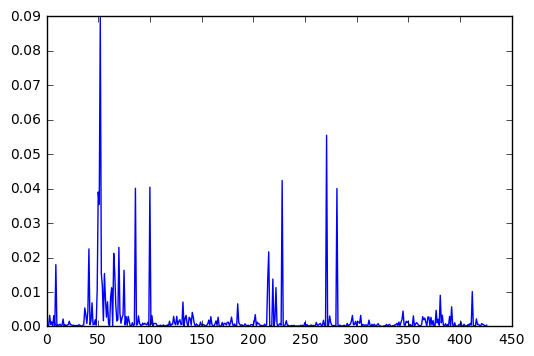

In [9]:
plt.plot(clf.feature_importances_)

In [11]:
df_weights = pd.DataFrame({'names':df.columns.values[:427], 'weight':clf.feature_importances_})

In [12]:
df_sort = df_weights.sort_values('weight', ascending = False)

In [13]:
df_sort.head()

,names,weight
52,tGravityAcc-min-X53,0.089645
271,fAcc-mad-X272,0.055504
228,tAccJerk-mad229,0.042356
100,tAccJerk-iqr-Y101,0.040424
86,tAccJerk-mad-X87,0.040119


In [17]:
feature_order = [] 
for x, val in enumerate(feature_imp):
    feature_order.append([x,val])
# print(feature_order)
# sorted([('abc', 121),('abc', 231),('abc', 148), ('abc',221)], key=lambda x: x[1])
feature_sorted = sorted(feature_order, key=lambda x: x[1], reverse=True)

In [18]:
print(feature_sorted) 
# should print column number of each item and associated value.

[[428, 0.076173529315286329], [53, 0.073202277070907582], [41, 0.056422261755724644], [49, 0.056101519214883808], [86, 0.047496574716644008], [87, 0.040865604933722856], [321, 0.040332641512250064], [308, 0.040091740698817976], [234, 0.039958402152542184], [378, 0.026261396459420605], [51, 0.02614434192754251], [69, 0.022852911641475827], [67, 0.022132968549783309], [52, 0.019582296445268314], [376, 0.019295328218996995], [3, 0.018766488162258056], [216, 0.016494215201005396], [345, 0.014992530196429521], [68, 0.013959463875366489], [126, 0.012483155985570983], [223, 0.012481295683270032], [129, 0.010001545530964287], [42, 0.0098230552067680391], [219, 0.0090455204986528738], [50, 0.008974521616999357], [55, 0.0082383918091608922], [214, 0.0074466265115828685], [366, 0.0073959192326676108], [73, 0.0065468280459899412], [56, 0.0063113340466746009], [145, 0.0058578033602973605], [57, 0.0057014101207162379], [329, 0.0052541581769983761], [379, 0.0049384688563460745], [60, 0.00468688842377

In [21]:
type(cross)

pandas.core.frame.DataFrame

In [22]:
cross.columns.values

array(['1', '2', '3', '4', '5', '6'], dtype=object)

In [40]:
cross['1'][0]

408

In [25]:
cross.iloc(1)

In [26]:
print(cross.iloc(1))

In [28]:
cross.iloc(1)[1].values

array([  6, 372,   4,   0,   0,   0])

In [31]:
cross.iloc(0)[0][0]

408

In [35]:
cross.iloc(0)[0][1]

4

In [36]:
for r in range(5):
    for c in range(5):
        print(cross.iloc(r)[c][0])

408
6
13
0
0
408
6
13
0
0
408
6
13
0
0
408
6
13
0
0
408
6
13
0
0


In [41]:
cross.iloc[0]

predicted
1    408
2      4
3      2
4      0
5      0
6      0
Name: 1, dtype: int64

In [42]:
cross.head()

predicted,1,2,3,4,5,6
actual,,,,,,
1,408,4,2,0,0,0
2,6,372,4,0,0,0
3,13,7,324,0,0,0
4,0,0,0,412,13,0
5,0,0,0,12,479,0


In [127]:
tot = 0
tot_correct = 0

for ind, val in enumerate(cross.columns.values):
    for amt in cross.iloc[ind]:
#         print(amt)
        tot += amt
#    print(cross.iloc[ind])
print(tot)

for col in cross.columns.values:
    correct_pred = cross.loc[col][col] # gives diagonal
#     print(correct_pred)
    tot_correct += correct_pred
    
print(tot_correct)
print(tot_correct // tot)

print('Accuracy of model = {:f}'.format(float(tot_correct)) / float(tot))


2522
2460
0


TypeError: unsupported operand type(s) for /: 'str' and 'float'

In [122]:
type(tot)
   

numpy.int64

In [107]:
print('Total Value of all items = {}'.format(total_sum))
    
print('Total value of all correct items = {}'.format(total_correct))

print('Accuracy = {}'.format(total_correct / total_sum))

Total Value of all items = actual
1    2484
2    2292
3    2064
4    2550
5    2946
6    2796
dtype: int64
Total value of all correct items = 2460
Accuracy = actual
1    0.990338
2    1.073298
3    1.191860
4    0.964706
5    0.835031
6    0.879828
dtype: float64


In [91]:
cross.sum(axis = 1)

actual
1    414
2    382
3    344
4    425
5    491
6    466
dtype: int64

In [92]:
correct_pred

465

In [45]:
cross.iloc[0]

predicted
1    408
2      4
3      2
4      0
5      0
6      0
Name: 1, dtype: int64

In [49]:
cross.iloc[1]

predicted
1      6
2    372
3      4
4      0
5      0
6      0
Name: 2, dtype: int64

In [51]:
cross.loc['1']

predicted
1    408
2      4
3      2
4      0
5      0
6      0
Name: 1, dtype: int64

In [94]:
type(total_sum)

pandas.core.series.Series

TypeError: 'NoneType' object is not callable

In [97]:
type(total_correct)

numpy.int64

In [98]:
total_correct

2460

In [99]:
df = cross.iloc[1:]

NameError: name 'name' is not defined